# Statistical Evidence and Testing
_Bryan Graham_    
_University of California at Berkeley_    
_January 2019_ (updated January 2025)    
<br>
#### Code citation:
<br>
Graham, Bryan S. (2019). "Statistical Evidence and Testing Python Jupyter Notebook," (Version 1.0) (Computer program). Available at http://bryangraham.github.io/econometrics/ (Accessed 27 May 2019)    

#### References:
"Grand jury discrimination" (1977). _Journal of Criminal Law and Criminology_ 68 (4): 533 - 542.   
<br>
Kaye, D. H. (1985). "Statistical analysis in jury discrimination cases," _Jurimetrics_ 25 (3): 274 – 289.
<br>
Kaye, D. H. (1986). "Is proof of statistical significance relevant?" _Washington Law Review_ 61 (4) :1333 - 1365.

In [1]:
# Direct Python to plot all figures inline (i.e., not in a separate window)
%matplotlib inline

# Load libraries
import numpy as np
import numpy.linalg
import scipy as sp

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.power as smp

In [2]:
# Directory where figures generated below are saved
workdir =  '/Users/bgraham/Dropbox/Teaching/Berkeley_Courses/MaCSS/Notebooks/'
graphics =  '/Users/bgraham/Dropbox/Teaching/Berkeley_Courses/MaCSS/Graphics/'

### Castenada v. Partida
In 1972 Rodrigo Partida was indicted by a grand jury in Hidalgo County, Texas for burglary with an intent to rape. He was subsequently convicted in a jury trial and sentenced to eight years in prison. Partida sought _habeas corpus_ relief, arguing that the grand jury selection process discriminated against Mexican-Americans and hence violated the Fourteenth Amendment.
<br>
<br>
Partida's argument for retrial centered on the observation that, according to 1970 US Census, there were $181,535$ individuals resident in Hidalgo County, of which $143,611$ -- or $79.1\%$ -- had Mexican-American surnames. During this period, however, only $339$ of the $870$ people selected for grand jury duty -- or just $39.0\%$ -- had Mexican-American surnames. This suggested, according to Partida, that Mexican-Americans were underrepresented on grand juries, compromising his constitutional rights.
<br>
<br>
Service on a jury requires more than residence in a jurisdiction. Jurors are adults and must be citizens. Most states impose additional requirements, excluding -- for example -- those convicted of a felony, requiring proficiency in English, literacy and for jurors "to be of good moral character". Lists of potential jurors are complied by local officials, often from voter rolls, drivers license records and so on. When the relevant data are available, statutorily disqualified individuals may be excluded from such lists, but more generally a lack of qualification is only revealed after a potential juror reports to the courthouse. In Hidalgo County the list of potential grand jurors was $50\%$ Mexican-American.
<br>
<br>
Partida's petitions were denied at the state and district level. The State of Texas argued that the lower percentage of Mexican-Americans among jurors reflected the generally lower educational background of this group (literacy was a requirement for grand jury duty in Texas at the time) as well as the inflation of this population by "illegal aliens" (citizenship is also a requirement for grand jury duty). The lower courts also noted that the elected Sheriff of Hidalgo County, Claudio Castaneda, was himself Mexican-American and hence it was _a priori_ implausible that he would deliberately choose not to serve jury summons to potential Mexican-American jurors. Furthermore the lower courts also observed that Mexican-Americans were a governing majority in Hidaglo County, further suggesting that an intent to discriminate was implausible. 
<br>
<br>
In 1976 the Supreme Court heard the case. They concluded that, although Mexican-American's were a governing majority in Hidalgo County, this fact could not explain away the substantial statistical evidence of discriminatory jury selection. Nor could claims of unequal educational background or a lack of citizenship.
<br>
<br>
The case is interesting to us because of its overt invocation of formal statistic arguments. To analyze the Supreme Court's reasoning begin by ignoring the State's arguments regarding differences in literacy and citizenship across residents with and without Mexican heritage in Hidalgo County. That is, assume that both groups are equally eligible to serve on grand juries.
<br>
<br>
Under this null the _ex ante_ probability that a randomly selected individual juror is Mexican-American is $\theta= 0.791$. If a total of $N=870$ jurors are selected in a given period, and each juror is either Mexican-American or not, then there are $2^{870}$ possible _sequences_ of juror selection that could have occurred. Only one such sequence is realized. The probability of any sequence which includes $z=339$ Mexican-Americans and $N-z=870-339=531$ non-Mexican-American is:

<div>$$ \theta^{z} \times (1-\theta)^{N-z}  $$</div>

Of the $2^{N}=2^{870}$ possible sequences, a total of $\binom{N}{z}=\frac{N!}{z!(N-z)!}$ contain exactly $z=339$ out $N=870$ jurors being Mexican-American. The _ex ante_ probability of observing the exact Hidalgo County grand juror mix is thus

<div>$$ \binom{N}{z} \times \theta^{z} \times (1-\theta)^{N-z} \approx 3.47741 \times 10^{-145}  $$</div>

A very small number.
<br>
<br>
We  are assuming that jurors are selected independently at random. This ignores the fact that jurors are typically sampled _without replacement_ (i.e., once you are summoned for jury duty, you typically are not eligible to be summoned again for several years). The population of Hidalgo County in 1972, however, was large enough for this detail to be inconsequential.
<br>
<br>
We have defined $z$ to be the number of Mexican-American jurors selected out of a total of $N=870$. We are assuming that each juror is selected independently at random with an _ex ante_ probability that they are Mexican-American of $\theta=0.791$. That is, $z$ is the realized value of the $\mathrm{Binomial}(N,\theta)$ random variable $Z$.
<br>
<br>
Let $H_0$ denote the null of unbiased juror selection. We can use the SciPy binomial cdf function to compute the probability -- _under the maintained null_ -- of selecting $z=339$ _or fewer_ Mexican-American jurors out of a total
of 870 jurors:
<div>$$ \Pr\left(\left.Z\leq z\right|H_{0}\right) \approx 4.18061 \times 10^{-145} $$</div>

In [3]:
N = 870    # Number of grand jury summons

# Case 1 : eligible jury pool reflects county-wide demographics
theta = 0.791  # Probability a Mexican-American is selected if summons are made at random

Pr_339orFewer   = sp.stats.binom.cdf(339, N, theta)    
print("Scenario 1 : Eligible jury pool reflects county-wide demographics")
print("Chance of selecting 339 or fewer Mexican-American jurors under null: " + \
      '{:.5E}'.format(Pr_339orFewer)) 

Scenario 1 : Eligible jury pool reflects county-wide demographics
Chance of selecting 339 or fewer Mexican-American jurors under null: 4.18061E-145


The Supreme Court argued that because the observed juror composition was so implausible under the null of no discrimination, that the evidence instead suggested discrimination was present. The court further argued that the fraction of non-citizen residents in Hidaglo county was too small to change this conclusion; as were differences in literacy levels across Mexican- and non-Mexican-Americans.
<br>
<br>
The Court's written opinion suggests that, in their view, the composition of the official jury pool itself, which as noted above was $50\%$ Mexican-American, was likely a consequence discriminatory assignment to the rolls. However, for the sake of argument, lets assume that the jury pool was appropriately selected (i.e., that only statutorily disqualified individuals were excluded). In this case the _ex ante_ probability that a selected juror would be Mexican-American would be $\theta=0.5$. In this scenario the probability of selecting $z=339$ or _fewer_ Mexican-American jurors out of a total of $870$ jurors equals
<div>$$ \Pr\left(\left.Z\leq z\right|H_{0}\right) \approx 3.98- \times 10^{-11} $$</div>
This is still a very small chance!

In [4]:
# Case 2 : eligible jury pool is defined by county-compiled roll
theta = 0.50  # Probability a Mexican-American is selected if summons are made at random

Pr_339orFewer   = sp.stats.binom.cdf(339, N, theta)    
print("")
print("Scenario 2 : Eligible jury pool is defined by county-compiled roll")
print("Chance of selecting 339 or fewer Mexican-American jurors under null: " + \
      '{:.5E}'.format(Pr_339orFewer)) 


Scenario 2 : Eligible jury pool is defined by county-compiled roll
Chance of selecting 339 or fewer Mexican-American jurors under null: 3.98019E-11


The evidence for discrimination was very strong. The calculations outlined above are of the type invoked in the actual written opinion of the Supreme Court. _Castaneda v. Partida_ was an important milestone for the use of statistical reasoning in legal arguments. See the paper by Kaye (1985) for details and discussion.
<br>
<br>
Note, however, the nature of the argument. Under the null of random juror selection -- whether the relevant pool reflects the county-wide demographics or is given by the official county-complied juror rolls -- it is technically _possible_ that only $339$ out of $870$ selected jurors were Mexican-American, it is just _extraordinarily_ unlikely. We reject the null of no discrimination in juror selection because we observe somethat that occurs so rarely under the null that it "must be the case" that the null is false. Of course there is some risk of making a mistake (once in a blue moon happens from time to time). More on this below.

### Interpreting statistical evidence
To better understand the Supreme Court's reasoning it is helpful to work through a simple thought experiment in some detail. Imagine we observed a pool of $10$ selected jurors, only four of whom are Mexican-American. This strikes us as suspicious. Can formalize our hunch using statistical reasoning?
<br>
<br>
We calculate the _ex ante_ frequency with which "four-out-ten" selected jurors are Mexican-American under two scenarios. The _null_ scenario is that Mexican-Americans jurors are selected with an _ex ante_ probability of $\theta=0.791$ -- their countywide population share -- and non-Mexican-Americans with a probability of $1- \theta=0.209$. We call this the _null_ scenario since it seems it seems fair to give the Hidalgo County legal system the benefit of the doubt. We don't want to accuse the Hidalgo County of discriminating unless we can present strong evidence that jury selection is, in fact, discriminatory.
<br>
<br>
We also calculate the probability of the event "four-out-ten" selected jurors are Mexican-American under an _alternative_ scenario where, if the county official samples a Mexican-American, they throw them out about half the time. Under this discriminatory scenario the chance that a chosen juror is Mexican-American is only $\theta=0.4$.
<br>
<br>
The next snippet of code constructs the probability mass function for number of jurors selected being Mexican-American under the _null_ and _alternative_ scenarios.

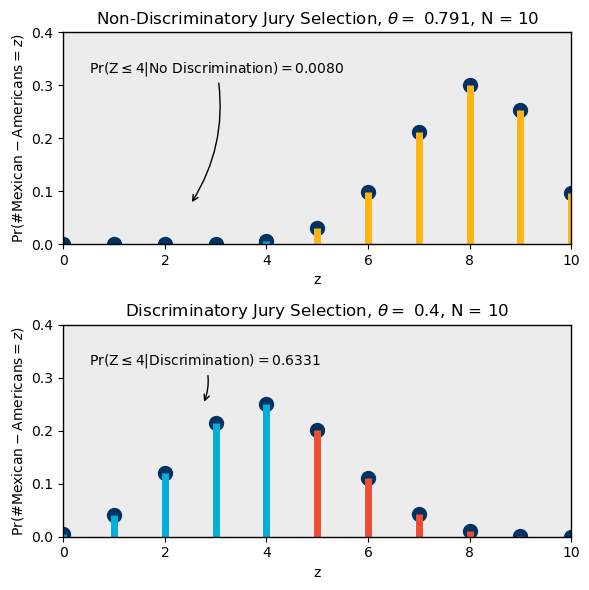

In [5]:
N = 10
theta = 0.791
theta_bias = 0.4 # (roughly 339/870 as observed)


fig_juror_pmf = plt.figure(figsize=(6, 6))    

# Calculate pmf of "number Mexican-American jurors out 10" under the two scenarios
juror_pmf = []
for h in range(0,N+1,1):
    juror_pmf.append([h,sp.stats.binom.pmf(h, N, theta), sp.stats.binom.pmf(h, N, theta_bias)])

num_MexAmr = np.array(juror_pmf)[:,0]
pmf        = np.array(juror_pmf)[:,1]
bias_pmf   = np.array(juror_pmf)[:,2]

# ------------------------------------------ #
# - NO DISCRIMINATION                      - #
# ------------------------------------------ #

ax = fig_juror_pmf.add_subplot(2,1,1)

# Plot pmf of the random variable: number Mexican-American jurors across 10 fair selections
ax.plot(num_MexAmr, pmf, 'o', color='#003262', ms=10, label='binom pmf') 
ax.vlines(num_MexAmr[0:5], 0, pmf[0:5], colors='#00B0DA', lw=5)
ax.vlines(num_MexAmr[5:], 0, pmf[5:], colors='#FDB515', lw=5)
ax.annotate(r'$\Pr (\mathrm{Z \leq 4}|\mathrm{No}\ \mathrm{Discrimination}) = $' + "%0.4f" % (sp.stats.binom.cdf(4, N, theta)) , \
            xy=(2.5, 0.075), xytext=(0.5, 0.325), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"), \
            horizontalalignment='left')

# Set axis labels
plt.title(r'Non-Discriminatory Jury Selection, $\theta =$ ' + str(theta) +', N = ' + str(N), fontsize=12)
plt.xlabel('z')
plt.ylabel(r'$\Pr (\#\mathrm{Mexican-Americans} = z)$')
    
# Set plot range and tick marks
plt.ylim([0,0.4])
plt.xlim([0,N])  
plt.yticks([0, 0.1, 0.2, 0.3, 0.4], fontsize=10)

# Clean up the plot, add frames, remove gridlines etc.
ax = plt.gca()
ax.patch.set_facecolor('gray')               # Color of background
ax.patch.set_alpha(0.15)                     # Translucency of background
ax.grid(False)                               # Remove gridlines from plot

# Add frame around plot
for spine in ['left','right','top','bottom']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_color('k')
    ax.spines[spine].set_linewidth(1)
    
# ------------------------------------------ #
# - DISCRIMINATION                         - #
# ------------------------------------------ #    

ax = fig_juror_pmf.add_subplot(2,1,2)

# Plot pmf of the random variable: number Mexican-American jurors across 10 discriminatory selections
ax.plot(num_MexAmr, bias_pmf, 'o', color='#003262', ms=10, label='binom pmf') 
ax.vlines(num_MexAmr[0:5], 0, bias_pmf[0:5], colors='#00B0DA', lw=5)
ax.vlines(num_MexAmr[5:], 0, bias_pmf[5:], colors='#ED4E33', lw=5)
ax.annotate(r'$\Pr (\mathrm{Z \leq 4}|\mathrm{Discrimination}) = $' + "%0.4f" % (sp.stats.binom.cdf(4, N, theta_bias)) , \
            xy=(2.75, 0.25), xytext=(0.5, 0.325), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"), \
            horizontalalignment='left')

# Set axis labels
plt.title(r'Discriminatory Jury Selection, $\theta =$ ' + str(theta_bias) +', N = ' + str(N), fontsize=12)
plt.xlabel('z')
plt.ylabel(r'$\Pr (\#\mathrm{Mexican-Americans} = z)$')
    
# Set plot range and tick marks
plt.ylim([0,0.4])
plt.xlim([0,N])  
plt.yticks([0, 0.1, 0.2, 0.3, 0.4], fontsize=10)

# Clean up the plot, add frames, remove gridlines etc.
ax = plt.gca()
ax.patch.set_facecolor('gray')               # Color of background
ax.patch.set_alpha(0.15)                     # Translucency of background
ax.grid(False)                               # Remove gridlines from plot

# Add frame around plot
for spine in ['left','right','top','bottom']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_color('k')
    ax.spines[spine].set_linewidth(1)
    
# Increase spacing between subplots & save result
fig_juror_pmf.subplots_adjust(hspace=0.4,wspace=0.25)
plt.tight_layout()
plt.savefig(graphics+'Castaneda_v_Partida.png', bbox_inches='tight', dpi=1000)       

Our calculations reveal that if jurors were selection with an _ex ante_ probability of being Mexican-American equal to $\theta=0.791$, then the chance of observed a pool of $10$ jurors with just $4$ are Mexican-American is only $0.01$. It appears as though our suspicion is justifed.
<br>
<br>
If instead Mexican-Americans are being selected with a discriminatory probability of $\theta=0.4$, the event "no more than four out of ten jurors are Mexican-American" occurs with about $63\%$ of the time. 
<br>
<br>
What we observe is an event that occurs rarely under the null (about $1\%$ of the time), but frequently under the alternative (about $63\%$) of the time.
<br>
<br>
A one percent chance is low odds, but well within the realm of possibility. What if we observe the event "no more than forty out of one hundred jurors are Mexican-American"?

In [6]:
print("Chance of observing fewer than 4 out of 10 jurors being Mexican-American:")
print("(No Discrimination Scenario)")
for N in [10, 100, 1000]:
    print("When a total of " + str(N) +" jurors are chosen = " + "%0.10f" % sp.stats.binom.cdf(0.4*N, N, theta))

Chance of observing fewer than 4 out of 10 jurors being Mexican-American:
(No Discrimination Scenario)
When a total of 10 jurors are chosen = 0.0079949631
When a total of 100 jurors are chosen = 0.0000000000
When a total of 1000 jurors are chosen = 0.0000000000


While we might occasionally observe that no more than $4$ of $10$ jurors are Mexican-American in the absence of discriminatory juror selection; the chance that we observe that no more than $40$ of $100$ jurors are Mexican-American is negiligble.
<br>
<br>
In contrast, this event occurs about half the time under our discriminatory scenario.

In [7]:
print("Chance of observing fewer than 4 out of 10 jurors being Mexican-American:")
print("(Discrimination Scenario)")
for N in [10, 100, 1000]:
    print("When a total of " + str(N) +" jurors are chosen = " + "%0.10f" % sp.stats.binom.cdf(0.4*N, N, theta_bias))

Chance of observing fewer than 4 out of 10 jurors being Mexican-American:
(Discrimination Scenario)
When a total of 10 jurors are chosen = 0.6331032576
When a total of 100 jurors are chosen = 0.5432944859
When a total of 1000 jurors are chosen = 0.5137298583


### Normal approximation
If you look at your pmf for the random variable "number of Mexican-American jurors out of $10$  fairly selected" you'll notice it is bell-shaped. Note that for selection probability, $\theta$, the expected number of Mexican-American jurors across $N$ independent selections is

<div>$$ \mathbb{E}[\textrm{Number of Mexican-Americans selected out of N summons}] = N\theta $$ </div>

while its variance is

<div>$$ \mathbb{V}(\textrm{Number of Mexican-Americans selected out of N summons}) = N\theta(1-\theta) $$ </div>

Now consider the normalized statistic

<div>$$ Y = \frac{\textrm{Number of Mexican-Americans selected out of N summons} - N\theta}{\sqrt{N\theta(1-\theta)}} $$ </div>

First observe that $Y$ is just a one-to-one transformation of our original random variable "Number of Mexican-American jurors out of $N$ fairly selected". We already calculated the probability mass function for this random variable for the case of $N=10$ and can do so for general $N$ too. So it is easy enough to calculate the pmf (or cdf) for $Y$.
<br>
<br>
Second $Y$ is mean zero and has unit variance. It is for these reasons that we call it "normalized" or "standardized". It turns out that normalized statistics like $Y$, if they are themselves composed of an average of many independent random variables, will behave "as if" they were standard normal random variables if $N$ is large enough. This convergence in distribution is due to the _Central Limit Theorem_. This theorem allows us to treat many types of sample averages "as if" they were normal random variables. This is a very useful approximation. While this approximation is often good, it can also be quite poor in special cases.
<br>
<br>
The next snippet of code compares the actual distribution of Y to the reference $\mathcal{N}(0,1)$ distribution. The plot after the code shows the actual cdf of T for $n = 5, 10, 20$ and $50$. This is the step-function in each of the four panels. Recall that $Y$ is discretely valued. The smooth curve in each panel is the reference $\mathcal{N}(0,1)$ cdf. We can visually see the approximation improve with $N$. The plots are done for the case where $\theta=0.50$.

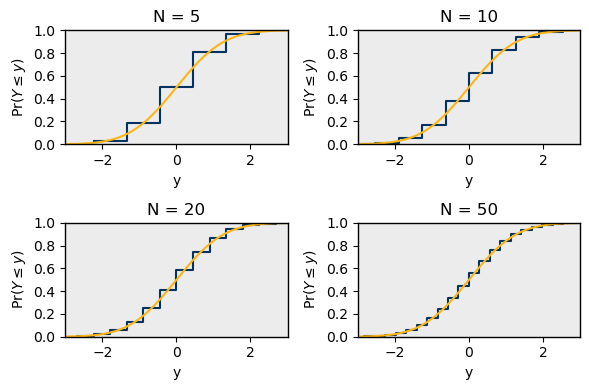

In [8]:
sample_size = [5, 10, 20, 50]
theta = 0.5

fig_norm_approx = plt.figure(figsize=(6, 4))    

f = 1
for n in sample_size:
    coin_flip_cdf  = []
    coin_flip_norm = []

    for y in range(0,n+1,1):
        coin_flip_cdf.append([(y-n*theta)/((n*theta*(1-theta))**0.5), sp.stats.binom.cdf(y, n, theta)])

    for y in np.arange(-3,3,0.01):
        coin_flip_norm.append([y, sp.stats.norm.cdf(y, 0, 1)])    
    
    
    ax = fig_norm_approx.add_subplot(2,2,f)
    
    f += 1 
    
    num_heads = np.array(coin_flip_cdf)[:,0]
    cdf       = np.array(coin_flip_cdf)[:,1]

    norm_num_heads = np.array(coin_flip_norm)[:,0]
    norm_pdf       = np.array(coin_flip_norm)[:,1]

    ax.plot(num_heads, cdf, '-', drawstyle='steps-post', color='#003262', label='binom cdf')    
    ax.plot(norm_num_heads, norm_pdf, '-', color='#FDB515', label='norm cdf')    

    # Set axis labels
    plt.title('N = ' + str(n), fontsize=12)
    plt.xlabel('y')
    plt.ylabel(r'$\Pr (Y \leq y)$')

    # Set plot range and tick marks
    plt.ylim([0,1])
    plt.xlim([-3,3])  
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=10)

    # Clean up the plot, add frames, remove gridlines etc.
    ax = plt.gca()
    ax.patch.set_facecolor('gray')               # Color of background
    ax.patch.set_alpha(0.15)                     # Translucency of background
    ax.grid(False)                               # Remove gridlines from plot

    # Add frame around plot
    for spine in ['left','right','top','bottom']:
        ax.spines[spine].set_visible(True)
        ax.spines[spine].set_color('k')
        ax.spines[spine].set_linewidth(1)

# Increase spacing between subplots & save result
fig_norm_approx.subplots_adjust(hspace=0.6,wspace=0.4)
plt.tight_layout()
plt.savefig(graphics+'Normal_Approximation.png', bbox_inches='tight', dpi=1000)  

### Testing hypothesis

Assume we have a statistic that is composed of some average of independent random variables. We normalize this statistic by subtracting its mean _under some maintained null hypothesis_ and dividing by the square root of its variance (also as computed under the _maintained null hypothesis_ if relevant). By the CLT this statistic should behave like a $\mathcal{N}(0,1)$ if the _maintained null hypothesis_ is true.
<br>
<br>
We can use the above observation for hypothesis testing: (i) form a statistic that is approximately $\mathcal{N}(0,1)$ under a _maintained null hypothesis_, (ii) reject this hypothesis is we observe unusual values of the statistic. This is how the Supreme Court reasoned in _Castenada v. Partida_.
<br>
<br>
For more on this idea see any introductory statistics textbook. The next two snippets of code reproduce the standard set of figures used to illustrate the logic of hypothesis testing. The first figure is for so called one-sided tests. The second for two-sided tests.

### Code to construct one-sided hypothesis test figure

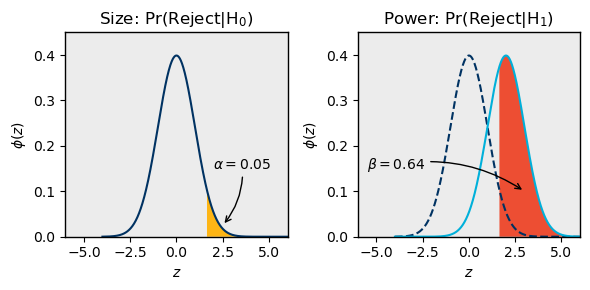

In [9]:
alpha = 0.05
crit  = sp.stats.norm.ppf(1-alpha)

size = []
power = []

fig_testing = plt.figure(figsize=(6, 3))    

for y in np.arange(-4,6,0.01):
    size.append([y, sp.stats.norm.pdf(y, 0, 1)])
    power.append([y, sp.stats.norm.pdf(y, 2, 1)])
 
size_z   = np.array(size)[:,0]
size_pdf = np.array(size)[:,1]

power_z   = np.array(power)[:,0]
power_pdf = np.array(power)[:,1]

# ----------------------------------- #
# - SIZE                            - #
# ----------------------------------- #

ax = fig_testing.add_subplot(1,2,1)
ax.plot(size_z, size_pdf, '-', color='#003262', label='norm pdf')   
ax.fill_between(size_z, size_pdf, where=size_z >= crit, facecolor='#FDB515', interpolate=True) 
ax.annotate(r'$\alpha = 0.05$', xy=(2.5, 0.025), xytext=(2, 0.15),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"), horizontalalignment='left')

# Set axis labels
plt.title(r'Size: $\Pr (\mathrm{Reject}|\mathrm{H_{0}})$', fontsize=12)
plt.xlabel(r'$z$')
plt.ylabel(r'$\phi (z)$')
    
# Set plot range and tick marks
plt.ylim([0,0.45])
plt.xlim([-6,6])  
plt.yticks([0, 0.1, 0.2, 0.3, 0.4], fontsize=10)

# Clean up the plot, add frames, remove gridlines etc.
ax = plt.gca()
ax.patch.set_facecolor('gray')               # Color of background
ax.patch.set_alpha(0.15)                     # Translucency of background
ax.grid(False)                               # Remove gridlines from plot

# Add frame around plot
for spine in ['left','right','top','bottom']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_color('k')
    ax.spines[spine].set_linewidth(1)
    
# ----------------------------------- #
# - POWER                           - #
# ----------------------------------- #

ax = fig_testing.add_subplot(1,2,2)
ax.plot(size_z, size_pdf, '--', color='#003262', label='norm pdf')   
ax.plot(power_z, power_pdf, '-', color='#00B0DA', label='norm pdf')   
ax.fill_between(power_z, power_pdf, where=power_z >= crit, facecolor='#ED4E33', interpolate=True) 
ax.annotate(r'$\beta = $' + "%0.2f" % (1 - sp.stats.norm.cdf(crit, 2, 1)) , xy=(3, 0.1), xytext=(-5.5, 0.15),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"), horizontalalignment='left')

# Set axis labels
plt.title(r'Power: $\Pr (\mathrm{Reject}|\mathrm{H_{1}})$', fontsize=12)
plt.xlabel(r'$z$')
plt.ylabel(r'$\phi (z)$')
    
# Set plot range and tick marks
plt.ylim([0,0.45])
plt.xlim([-6,6])  
plt.yticks([0, 0.1, 0.2, 0.3, 0.4], fontsize=10)

# Clean up the plot, add frames, remove gridlines etc.
ax = plt.gca()
ax.patch.set_facecolor('gray')               # Color of background
ax.patch.set_alpha(0.15)                     # Translucency of background
ax.grid(False)                               # Remove gridlines from plot

# Add frame around plot
for spine in ['left','right','top','bottom']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_color('k')
    ax.spines[spine].set_linewidth(1)

# Increase spacing between subplots & save result
fig_testing.subplots_adjust(hspace=0.4,wspace=0.25)
plt.tight_layout()
plt.savefig(graphics+'Size_and_Power_One_Sided.png', bbox_inches='tight', dpi=1000)      

### Code to construct two-sided hypothesis test figure

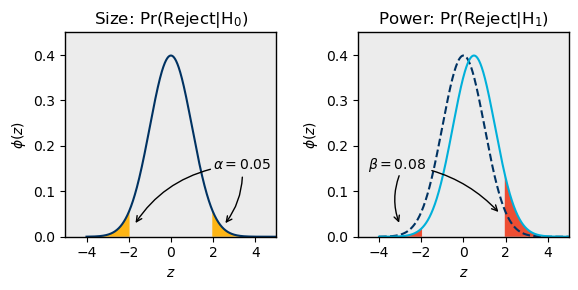

In [10]:
alpha = 0.05
crit  = sp.stats.norm.ppf(1-alpha/2)

size = []
power = []

fig_testing = plt.figure(figsize=(6, 3))    

for y in np.arange(-4,5,0.01):
    size.append([y, sp.stats.norm.pdf(y, 0, 1)])
    power.append([y, sp.stats.norm.pdf(y, 0.5, 1)])
 
size_z   = np.array(size)[:,0]
size_pdf = np.array(size)[:,1]

power_z   = np.array(power)[:,0]
power_pdf = np.array(power)[:,1]

# ----------------------------------- #
# - SIZE                            - #
# ----------------------------------- #

ax = fig_testing.add_subplot(1,2,1)
ax.plot(size_z, size_pdf, '-', color='#003262', label='norm pdf')   
ax.fill_between(size_z, size_pdf, where=size_z >= sp.stats.norm.ppf(1-alpha/2), facecolor='#FDB515', interpolate=True)
ax.fill_between(size_z, size_pdf, where=size_z <= sp.stats.norm.ppf(alpha/2), facecolor='#FDB515', interpolate=True)
ax.annotate(r'$\alpha = 0.05$', xy=(2.5, 0.025), xytext=(2, 0.15),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"), horizontalalignment='left')
ax.annotate("", xy=(-1.75, 0.025), xytext=(2, 0.15),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"), horizontalalignment='left')

# Set axis labels
plt.title(r'Size: $\Pr (\mathrm{Reject}|\mathrm{H_{0}})$', fontsize=12)
plt.xlabel(r'$z$')
plt.ylabel(r'$\phi (z)$')
    
# Set plot range and tick marks
plt.ylim([0,0.45])
plt.xlim([-5,5])  
plt.yticks([0, 0.1, 0.2, 0.3, 0.4], fontsize=10)

# Clean up the plot, add frames, remove gridlines etc.
ax = plt.gca()
ax.patch.set_facecolor('gray')               # Color of background
ax.patch.set_alpha(0.15)                     # Translucency of background
ax.grid(False)                               # Remove gridlines from plot

# Add frame around plot
for spine in ['left','right','top','bottom']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_color('k')
    ax.spines[spine].set_linewidth(1)
    
# ----------------------------------- #
# - POWER                           - #
# ----------------------------------- #

ax = fig_testing.add_subplot(1,2,2)
ax.plot(size_z, size_pdf, '--', color='#003262', label='norm pdf')   
ax.plot(power_z, power_pdf, '-', color='#00B0DA', label='norm pdf')   
ax.fill_between(power_z, power_pdf, where=power_z >=  crit, facecolor='#ED4E33', interpolate=True)
ax.fill_between(power_z, power_pdf, where=power_z <= -crit, facecolor='#ED4E33', interpolate=True) 
ax.annotate(r'$\beta = $' + "%0.2f" % (sp.stats.norm.cdf(-crit, 0.5, 1) + (1 - sp.stats.norm.cdf(crit, 0.5, 1))) , \
            xy=(1.75, 0.05), xytext=(-4.5, 0.15), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"), \
            horizontalalignment='left')
ax.annotate("" , \
            xy=(-3, 0.025), xytext=(-3, 0.14), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"), \
            horizontalalignment='left')

# Set axis labels
plt.title(r'Power: $\Pr (\mathrm{Reject}|\mathrm{H_{1}})$', fontsize=12)
plt.xlabel(r'$z$')
plt.ylabel(r'$\phi (z)$')
    
# Set plot range and tick marks
plt.ylim([0,0.45])
plt.xlim([-5,5])  
plt.yticks([0, 0.1, 0.2, 0.3, 0.4], fontsize=10)

# Clean up the plot, add frames, remove gridlines etc.
ax = plt.gca()
ax.patch.set_facecolor('gray')               # Color of background
ax.patch.set_alpha(0.15)                     # Translucency of background
ax.grid(False)                               # Remove gridlines from plot

# Add frame around plot
for spine in ['left','right','top','bottom']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_color('k')
    ax.spines[spine].set_linewidth(1)

# Increase spacing between subplots & save result
fig_testing.subplots_adjust(hspace=0.4,wspace=0.25)
plt.tight_layout()
plt.savefig(graphics+'Size_and_Power_Two_Sided.png', bbox_inches='tight', dpi=1000)      

In [11]:
# This imports an attractive notebook style from Github
from IPython.display import HTML
from urllib.request import urlopen
html = urlopen('http://bit.ly/1Bf5Hft')
HTML(html.read().decode('utf-8'))